In [ ]:
# Neha Annamalai, Anna Hubbard, Aaria Sethi
# CSCI 184 Project

In [ ]:
# imported libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# loading data frame
df = pd.read_csv("Placement_Data_Full_Class.csv")
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
for name, dtype in df.dtypes.iteritems():
  print(name, dtype)

sl_no int64
gender object
ssc_p float64
ssc_b object
hsc_p float64
hsc_b object
hsc_s object
degree_p float64
degree_t object
workex object
etest_p float64
specialisation object
mba_p float64
status object


In [ ]:
print("DF SHAPE: ")
print(df.shape)
print("\n")
print("DATAFRAME: ")
print(df)

DF SHAPE: 
(215, 14)


DATAFRAME: 
     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  
0     Sci&Tech     No

In [ ]:
# checking for columns with missing values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
# feature imputation, remove salary feature
df = df.drop("salary", axis=1)
print(df)

     sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status  
0     Sci&Tech     No     55.0         Mkt&HR  58.80    

In [ ]:
#One-Hot Encoding
X = pd.get_dummies(df.drop("status", axis=1)) #one-hot
print(X)

     sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p  gender_F  gender_M  \
0        1  67.00  91.00     58.00     55.0  58.80         0         1   
1        2  79.33  78.33     77.48     86.5  66.28         0         1   
2        3  65.00  68.00     64.00     75.0  57.80         0         1   
3        4  56.00  52.00     52.00     66.0  59.43         0         1   
4        5  85.80  73.60     73.30     96.8  55.50         0         1   
..     ...    ...    ...       ...      ...    ...       ...       ...   
210    211  80.60  82.00     77.60     91.0  74.49         0         1   
211    212  58.00  60.00     72.00     74.0  53.62         0         1   
212    213  67.00  67.00     73.00     59.0  69.72         0         1   
213    214  74.00  66.00     58.00     70.0  60.23         1         0   
214    215  62.00  58.00     53.00     89.0  60.22         0         1   

     ssc_b_Central  ssc_b_Others  ...  hsc_s_Arts  hsc_s_Commerce  \
0                0             1  ...     

In [ ]:
#Filter Feature Selection using chi-square
y = df["status"]
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
print(X.shape)
print(X_new.shape)
print(X_new[0])

(215, 22)
(215, 20)
[ 1.  67.  91.  58.  55.  58.8  0.   1.   0.   1.   0.   1.   0.   1.
  0.   0.   1.   0.   0.   1. ]


In [ ]:
#Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.5, random_state=0)

In [ ]:
#Naive-Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 108 points : 25


In [ ]:
#Performance Matrix
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.62      0.71      0.66        34
      Placed       0.86      0.80      0.83        74

    accuracy                           0.77       108
   macro avg       0.74      0.75      0.74       108
weighted avg       0.78      0.77      0.77       108



In [ ]:
#Tain and Test Data
y = df["status"]
X = pd.get_dummies(df.drop("status", axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 123)

In [ ]:
#Decision Tree - max depth 2
clf = DecisionTreeClassifier(max_depth = 2, random_state = 1)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

print("Test accuracy: ", metrics.accuracy_score(y_test, Y_pred))
print("Train accuracy: ", clf.score(X_train, y_train))

Test accuracy:  0.7846153846153846
Train accuracy:  0.8466666666666667


[Text(0.5, 0.8333333333333334, 'X[1] <= 62.5\ngini = 0.415\nsamples = 150\nvalue = [44, 106]'),
 Text(0.25, 0.5, 'X[2] <= 58.5\ngini = 0.431\nsamples = 51\nvalue = [35, 16]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.499\nsamples = 31\nvalue = [15, 16]'),
 Text(0.75, 0.5, 'X[2] <= 48.915\ngini = 0.165\nsamples = 99\nvalue = [9, 90]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.15\nsamples = 98\nvalue = [8, 90]')]

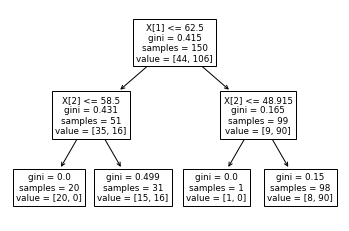

In [ ]:
tree.plot_tree(clf)

In [ ]:
#Decision Tree - max depth 3
clf = DecisionTreeClassifier(max_depth = 3, random_state = 1)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

print("Test accuracy: ", metrics.accuracy_score(y_test, Y_pred))
print("Train accuracy: ", clf.score(X_train, y_train))

Test accuracy:  0.8
Train accuracy:  0.8866666666666667


[Text(0.4444444444444444, 0.875, 'X[1] <= 62.5\ngini = 0.415\nsamples = 150\nvalue = [44, 106]'),
 Text(0.2222222222222222, 0.625, 'X[2] <= 58.5\ngini = 0.431\nsamples = 51\nvalue = [35, 16]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.3333333333333333, 0.375, 'X[3] <= 64.5\ngini = 0.499\nsamples = 31\nvalue = [15, 16]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.6666666666666666, 0.625, 'X[2] <= 48.915\ngini = 0.165\nsamples = 99\nvalue = [9, 90]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.375, 'X[5] <= 68.92\ngini = 0.15\nsamples = 98\nvalue = [8, 90]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.092\nsamples = 83\nvalue = [4, 79]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.391\nsamples = 15\nvalue = [4, 11]')]

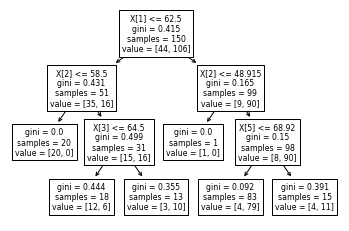

In [ ]:
tree.plot_tree(clf)

In [ ]:
#Decision Tree - max depth 4
clf = DecisionTreeClassifier(max_depth = 4, random_state = 1)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

print("Test accuracy: ", metrics.accuracy_score(y_test, Y_pred))
print("Train accuracy: ", clf.score(X_train, y_train))

Test accuracy:  0.8
Train accuracy:  0.92


[Text(0.4375, 0.9, 'X[1] <= 62.5\ngini = 0.415\nsamples = 150\nvalue = [44, 106]'),
 Text(0.1875, 0.7, 'X[2] <= 58.5\ngini = 0.431\nsamples = 51\nvalue = [35, 16]'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.25, 0.5, 'X[3] <= 64.5\ngini = 0.499\nsamples = 31\nvalue = [15, 16]'),
 Text(0.125, 0.3, 'X[2] <= 63.5\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.0625, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.3, 'X[21] <= 0.5\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.3125, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.4375, 0.1, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6875, 0.7, 'X[2] <= 48.915\ngini = 0.165\nsamples = 99\nvalue = [9, 90]'),
 Text(0.625, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.5, 'X[5] <= 68.92\ngini = 0.15\nsamples = 98\nvalue = [8, 90]'),
 Text(0.625, 0.3, 'X[1] <= 63.5\ngini = 0.092\nsampl

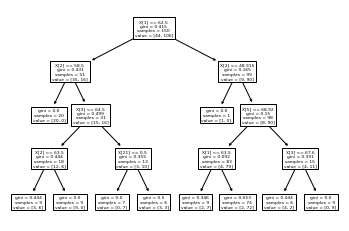

In [ ]:
tree.plot_tree(clf)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

minimum at num trees =  17 0.13023255813953494


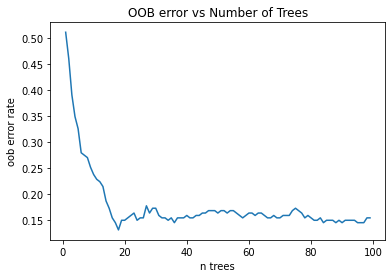

In [ ]:
ypts=[]
xpts=[]
for i in range(1,100):
  clf=RandomForestClassifier(n_estimators=i, oob_score=True, bootstrap=True,random_state=0)
  clf.fit(X, y)
  oob_error = 1-clf.oob_score_
  ypts.append(oob_error)
  xpts.append(i)
  
plt.plot(xpts, ypts)
plt.title("OOB error vs Number of Trees")
plt.xlabel("n trees")
plt.ylabel("oob error rate")
print("minimum at num trees = ", ypts.index(min(ypts)),min(ypts))
plt.show()

In [ ]:
y = df["status"]
X = pd.get_dummies(df.drop("status", axis=1))
forest = RandomForestClassifier(n_estimators = 15, oob_score = True, bootstrap=True,random_state=0)
forest.fit(X, y)

print('OOB score: ', forest.oob_score_)
print('OOB error: ', 1-forest.oob_score_)

OOB score:  0.827906976744186
OOB error:  0.172093023255814


In [ ]:
y = df["status"]
X = pd.get_dummies(df.drop("status", axis=1))
forest = RandomForestClassifier(n_estimators = 17, oob_score = True, bootstrap=True,random_state=0)
forest.fit(X, y)

print('OOB score: ', forest.oob_score_)
print('OOB error: ', 1-forest.oob_score_)

OOB score:  0.8558139534883721
OOB error:  0.14418604651162792


In [ ]:
y = df["status"]
X = pd.get_dummies(df.drop("status", axis=1))
forest = RandomForestClassifier(n_estimators = 20, oob_score = True, bootstrap=True,random_state=0)
forest.fit(X, y)

print('OOB score: ', forest.oob_score_)
print('OOB error: ', 1-forest.oob_score_)

OOB score:  0.8511627906976744
OOB error:  0.14883720930232558
